In [1]:
!pip install python-igraph

     |████████████████████████████████| 3.2MB 5.1MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font',family='Malgun Gothic')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### PatientInfo 데이터를 활용해서, 감염을 퍼트린 시초를 알아보자.


In [8]:
patientInfo = pd.read_csv('/content/gdrive/My Drive/dacon/COVID_19/PatientInfo.csv')

In [9]:
patientInfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [10]:
#infection_case가 contact with patient 인 경우만 분리
patient_who_infected_by_others = patientInfo[patientInfo['infection_case'] == 'contact with patient'].reset_index().drop(["index"], axis = 1)
patient_who_infected_by_others = patient_who_infected_by_others[['patient_id','sex','age','country','province','city','infection_case','infected_by']]
patient_who_infected_by_others['province_city'] = patient_who_infected_by_others['province'] + ' ' + patient_who_infected_by_others['city']
patient_who_infected_by_others = patient_who_infected_by_others.drop(["province","city"], axis = 1)
patient_who_infected_by_others.head()

,patient_id,sex,age,country,infection_case,infected_by,province_city
0,1000000003,male,50s,Korea,contact with patient,2002000001,서울 종로구
1,1000000005,female,20s,Korea,contact with patient,1000000002,서울 성북구
2,1000000006,female,50s,Korea,contact with patient,1000000003,서울 종로구
3,1000000007,male,20s,Korea,contact with patient,1000000003,서울 종로구
4,1000000010,female,60s,Korea,contact with patient,1000000003,서울 성북구


In [11]:
region = pd.read_csv('/content/gdrive/My Drive/dacon/COVID_19/Region.csv')
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [12]:
region = region[['code','province','city']]
region.head()

,code,province,city
0,10000,서울,서울
1,10010,서울,강남구
2,10020,서울,강동구
3,10030,서울,강북구
4,10040,서울,강서구


In [13]:
region['province_city'] = ''
for i in range(len(region)):
  if region['province'][i] == region['city'][i]:
    region['province_city'][i] = region['province'][i]
  else:
    region['province_city'][i] = region['province'][i] +' '+region['city'][i]
region = region[['code','province_city']]
region.head()

,code,province_city
0,10000,서울
1,10010,서울 강남구
2,10020,서울 강동구
3,10030,서울 강북구
4,10040,서울 강서구


In [14]:
patient_who_infected_by_others['infected_by'].isnull().sum() / patient_who_infected_by_others['infected_by'].size

0.23229813664596274

In [15]:
patient_who_infected_by_others = patient_who_infected_by_others.dropna(axis = 0)
patient_who_infected_by_others.head()

,patient_id,sex,age,country,infection_case,infected_by,province_city
0,1000000003,male,50s,Korea,contact with patient,2002000001,서울 종로구
1,1000000005,female,20s,Korea,contact with patient,1000000002,서울 성북구
2,1000000006,female,50s,Korea,contact with patient,1000000003,서울 종로구
3,1000000007,male,20s,Korea,contact with patient,1000000003,서울 종로구
4,1000000010,female,60s,Korea,contact with patient,1000000003,서울 성북구


In [16]:
patient_who_infected_by_others = patient_who_infected_by_others.reset_index().drop(['index'], axis = 1)

In [59]:
patient_who_infected_by_others.head()
trace = dict()
for i in range(len(patient_who_infected_by_others)):
  infected = patient_who_infected_by_others['infected_by'][i]
  patient = patient_who_infected_by_others['patient_id'][i]
  if infected in trace:
    trace[infected].append(patient)
  else:
    trace[infected] = [patient]
  
print(trace)
  

{'2002000001': [1000000003], '1000000002': [1000000005], '1000000003': [1000000006, 1000000007, 1000000010, 1000000017], '1000000017': [1000000013, 1000000016], '1000000013': [1000000014], '1000000021': [1000000019], '1000000016': [1000000021], '1000000031': [1000000033, 1000000034, 1000000037], '1000000033': [1000000045, 1000000067], '1000000041': [1000000046], '1000000047': [1000000064], '1000000068': [1000000065], '1000000111': [1000000113, 1000000119], '1000000115': [1000000114], '1000000040': [1000000117], '1000000114': [1000000118], '1000000120': [1000000121, 1000000126, 1000000128, 1000000129], '1000000108': [1000000127], '1000000100': [1000000130, 1000000178], '1000000130': [1000000134], '1000000140': [1000000164], '1000000124': [1000000174, 1000000189], '1000000127': [1000000188], '1000000164': [1000000221], '1000000211': [1000000224], '1000000212': [1000000225], '1000000230': [1000000232, 1000000233], '1000000237': [1000000242], '1000000246': [1000000250], '1000000250': [1000

In [128]:
getMax = 0
for key, value in trace.items():
  if len(value) > getMax:
    getMax = len(value)
getMax = getMax * 2 + 1

In [129]:
for key in trace:
  if len(trace[key]) < getMax:
    while len(trace[key]) < getMax:
      trace[key].append(0) 

size = []
for key,value in trace.items():
  size.append(len(value))


trace_df = pd.DataFrame(trace)
trace_df = trace_df.T
trace_df = trace_df.reset_index()
trace_df.rename(columns={'index':'beginning'}, inplace = True)
trace_df.to_csv('/content/gdrive/My Drive/dacon/trace_testset.csv')


In [112]:
tree_testset = pd.read_csv('/content/gdrive/My Drive/dacon/tree_testset.csv')
tree_testset

,0,1,2,3,4
0,100,111,0,0,0
1,100,112,113,116,117
2,100,112,114,0,0
3,100,112,115,0,0
4,119,120,0,0,0
5,119,121,0,0,0


In [126]:
temp = list(tree_testset.loc[3])
temp = temp[:-2]
print(temp)
for i in range(len(tree_testset.loc[0])):
  if tree_testset.loc[0][i] == 0:
    tree_testset.loc[0][i:i+len(temp)+1] = temp


for i in range(len(tree_testset))):
  for j in range(4):
    if test_trace_df[str(j)][i] == 0:
      continue
    if test_trace_df[str(j)][i] in beginning:
      idx = beginning.index(test_trace_df[str(j)][i])
      tmp = list(test_trace_df.loc[i])
      for k in range(len(tmp)):
        if tmp[k] == 0:
          tmp = tmp[1:k]
          break
      for l in range(len(test_trace_df.loc[idx])):
        if test_trace_df.loc[idx][l] == 0:
          test_trace_df.loc[idx][l:l+len(tmp)+1] = tmp
          test_trace_df.drop([i], inplace = True)
          break

tree_testset

[100, 112, 115]


,0,1,2,3,4
0,100,111,100,112,115
1,100,112,113,116,117
2,100,112,114,0,0
3,100,112,115,0,0
4,119,120,150,150,150
5,119,121,0,0,0


In [187]:
test_trace_df = pd.read_csv('/content/gdrive/My Drive/dacon/trace_testset.csv')
test_trace_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [188]:
print(len(test_trace_df.loc[0]))
test_trace_df

104


,beginning,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
0,2002000001,1000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000000002,1000000005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1000000003,1000000006,1000000007,1000000010,1000000017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1000000017,1000000013,1000000016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1000000013,1000000014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,6100000068,6100000077,6100000082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
398,6100000076,6100000079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399,6100000108,6100000111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400,6100000100,6100000112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


시초가 같은 값들을 해당 시초에 넣음.... 

In [189]:
# for i in range(len(test_trace_df)):
i = 0
while i < len(test_trace_df):
  for j in range(103):
    beginning = list(test_trace_df['beginning'][:])
    if test_trace_df[str(j)][i] == 0:
      continue
    if test_trace_df[str(j)][i] in beginning:
      idx = beginning.index(test_trace_df[str(j)][i])
      tmp = list(test_trace_df.loc[idx])
      for k in range(len(tmp)):
        if tmp[k] == 0:
          tmp = tmp[1:k]
          break
      for l in range(len(test_trace_df.loc[idx])):
        if test_trace_df.loc[i][l] == 0:
          test_trace_df.loc[i][l:l+len(tmp)] = tmp
          test_trace_df.drop([idx], inplace = True)
          test_trace_df = test_trace_df.reset_index()
          test_trace_df.drop(["index"],axis= 1,inplace=True)
          break
  i += 1

모두 0을 갖는 열 삭제

In [199]:
dropcol = []
for i in range(0,103):
  tmp = list(test_trace_df[str(i)])
  if len(set(tmp)) == 1 and tmp[0] == 0:
    dropcol.append(i)

while dropcol:
  j = dropcol.pop()
  test_trace_df.drop([str(j)],axis=1,inplace= True)


test_trace_df.head()

,beginning,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,2002000001,1000000003,1000000006,1000000007,1000000010,1000000017,1000000013,1000000016,1000000014,1000000021,2000000019,1000000019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000000002,1000000005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1000000031,1000000033,1000000034,1000000037,1000000045,1000000067,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1000000041,1000000046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1000000047,1000000064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [200]:
test_trace_df.to_csv('/content/gdrive/My Drive/dacon/update_trace_testset_drop_all_zero.csv')

In [207]:
bg = list(test_trace_df['beginning'])

info_about_beginning = dict()
for p_id in bg:
  for i in range(len(patientInfo)):
    if int(patientInfo['patient_id'][i]) == int(p_id):
      info_about_beginning[p_id] = [patientInfo['sex'][i],patientInfo['age'][i],patientInfo['province'][i], patientInfo['city'][i], patientInfo['infection_case'][i]]
      break
    
print(info_about_beginning)

{1000000002: ['male', '30s', '서울', '중랑구', 'overseas inflow'], 1000000031: ['male', '50s', '서울', '송파구', 'etc'], 1000000041: ['male', '50s', '서울', '강동구', 'etc'], 1000000047: ['male', '20s', '서울', '강남구', 'Shincheonji Church'], 1000000068: ['female', '20s', '서울', '강남구', 'etc'], 1000000111: ['male', '30s', '서울', '강북구', 'contact with patient'], 1000000115: ['female', '50s', '서울', '양천구', 'contact with patient'], 1000000040: ['female', '60s', '서울', '관악구', 'overseas inflow'], 1000000120: ['male', '30s', '서울', '성북구', 'Dongan Church'], 1000000108: ['male', '40s', '서울', '기타', 'contact with patient'], 1000000100: ['male', '30s', '서울', '동대문구', 'Dongan Church'], 1000000140: ['female', '40s', '서울', '은평구', 'etc'], 1000000124: ['male', '20s', '서울', '동대문구', 'Dongan Church'], 1000000211: ['male', '20s', '서울', '동대문구', 'Dongan Church'], 1000000212: ['female', '20s', '서울', '동대문구', 'Dongan Church'], 1000000230: ['male', '20s', '서울', '관악구', 'overseas inflow'], 1000000237: ['female', '20s', '서울', '마포구', 'overse

In [211]:
info_about_beginning_df = pd.DataFrame(info_about_beginning)
info_about_beginning_df = info_about_beginning_df.T
info_about_beginning_df = info_about_beginning_df.reset_index()
info_about_beginning_df.rename(columns={'index':'beginning'}, inplace = True)
info_about_beginning_df

,beginning,0,1,2,3,4
0,1000000002,male,30s,서울,중랑구,overseas inflow
1,1000000031,male,50s,서울,송파구,etc
2,1000000041,male,50s,서울,강동구,etc
3,1000000047,male,20s,서울,강남구,Shincheonji Church
4,1000000068,female,20s,서울,강남구,etc
...,...,...,...,...,...,...
271,6100000068,female,60s,경상남도,거창,etc
272,6100000076,male,20s,경상남도,창녕,Changnyeong Coin Karaoke
273,6100000108,male,10s,경상남도,사천시,overseas inflow
274,6100000100,female,60s,경상남도,진주시,etc


In [214]:
info_about_beginning_df.columns = ["beginning","sex","age","province","city","infection_case"]
info_about_beginning_df

,beginning,sex,age,province,city,infection_case
0,1000000002,male,30s,서울,중랑구,overseas inflow
1,1000000031,male,50s,서울,송파구,etc
2,1000000041,male,50s,서울,강동구,etc
3,1000000047,male,20s,서울,강남구,Shincheonji Church
4,1000000068,female,20s,서울,강남구,etc
...,...,...,...,...,...,...
271,6100000068,female,60s,경상남도,거창,etc
272,6100000076,male,20s,경상남도,창녕,Changnyeong Coin Karaoke
273,6100000108,male,10s,경상남도,사천시,overseas inflow
274,6100000100,female,60s,경상남도,진주시,etc


In [221]:
import collections
infection_case_list = list(info_about_beginning_df['infection_case'])
infection_case_list = collections.Counter(infection_case_list)
print(infection_case_list.most_common(15))
infection_most_common = list(infection_case_list.most_common(15))

[('etc', 103), ('overseas inflow', 52), ('contact with patient', 37), ('gym facility in Cheonan', 14), ('Shincheonji Church', 12), (nan, 11), ('Itaewon Clubs', 11), ('Coupang Logistics Center', 8), ('Dongan Church', 5), ('Onchun Church', 5), ('Guro-gu Call Center', 4), ('Dunsan Electronics Town', 4), ('Orange Town', 2), ('gym facility in Sejong', 1), ('Ministry of Oceans and Fisheries', 1)]


In [250]:
print(infection_most_common)
tmp = dict()
for i in range(len(infection_most_common)):
  tmp[infection_most_common[i][0]] = infection_most_common[i][1]


[('etc', 103), ('overseas inflow', 52), ('contact with patient', 37), ('gym facility in Cheonan', 14), ('Shincheonji Church', 12), (nan, 11), ('Itaewon Clubs', 11), ('Coupang Logistics Center', 8), ('Dongan Church', 5), ('Onchun Church', 5), ('Guro-gu Call Center', 4), ('Dunsan Electronics Town', 4), ('Orange Town', 2), ('gym facility in Sejong', 1), ('Ministry of Oceans and Fisheries', 1)]


In [261]:
infection_most_common_df = pd.DataFrame(tmp, index = (0,len(tmp)))
infection_most_common_df = infection_most_common_df.T
infection_most_common_df.drop([15],axis=1,inplace=True)
infection_most_common_df = infection_most_common_df.reset_index()
infection_most_common_df.columns = ["infection case","number of cases"]
infection_most_common_df

,infection case,number of cases
0,etc,103
1,overseas inflow,52
2,contact with patient,37
3,gym facility in Cheonan,14
4,Shincheonji Church,12
5,NaN,11
6,Itaewon Clubs,11
7,Coupang Logistics Center,8
8,Dongan Church,5
9,Onchun Church,5


In [262]:
infection_most_common_df.set_index("infection case")

,number of cases
infection case,
etc,103
overseas inflow,52
contact with patient,37
gym facility in Cheonan,14
Shincheonji Church,12
NaN,11
Itaewon Clubs,11
Coupang Logistics Center,8
Dongan Church,5


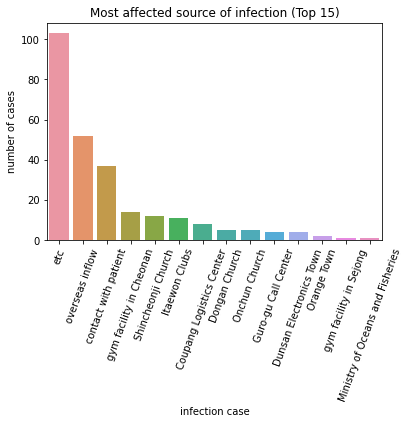

In [264]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='infection case',y='number of cases',data=infection_most_common_df)
plt.title('Most affected source of infection (Top 15)')
plt.xticks(rotation=70)
plt.show()